In [109]:
###### Loading dataset and importing libraries #####
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data = load_breast_cancer()
cancer_df = pd.DataFrame(data.data, columns=[data.feature_names])
cancer_df["Cancer"] = data.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [117]:
X = cancer_df.iloc[:,:-1]
y = cancer_df.iloc[:,-1]

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [121]:
#### Function to find correlated columns ####
def correlation(dataset, threshold):
  col_corr  = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

In [122]:
corr_features = correlation(X_train, 0.8)
print(corr_features)

{('worst texture',), ('worst concavity',), ('worst perimeter',), ('worst compactness',), ('worst area',), ('mean concavity',), ('area error',), ('worst smoothness',), ('worst fractal dimension',), ('mean area',), ('worst radius',), ('mean concave points',), ('perimeter error',), ('fractal dimension error',), ('mean perimeter',), ('worst concave points',)}


In [123]:
###### Dropping the correlated columns #######
X_train = X_train.drop(corr_features, axis =1)
X_test = X_test.drop(corr_features, axis =1)

In [125]:
###### Scaling the dataset #######
from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

**Logistic Regression**

In [126]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()
logisticReg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
pred = logisticReg.predict(X_test_scaled)

In [128]:
##########  Performance Metrics for Logistic Regression   ########
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test,pred)
classification_report = classification_report(y_test,pred)
print('Confusion Matrix')
print(confusion_matrix)
print('Accuracy - ',np.round(accuracy,3))
print('Classification Report')
print(classification_report)


Confusion Matrix
[[ 60   5]
 [  2 104]]
Accuracy -  0.959
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        65
           1       0.95      0.98      0.97       106

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



**K Nearest Neighbors**

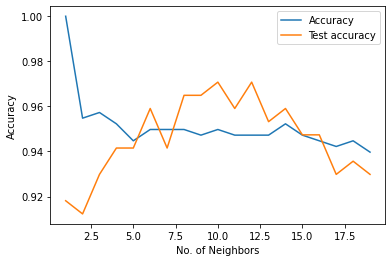

In [131]:
from sklearn.neighbors import KNeighborsClassifier

acc =[]
test_acc = []

neighbors_range = range(1,20)

for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled,y_train)
    acc.append(knn.score(X_train_scaled, y_train))
    test_acc.append(knn.score(X_test_scaled, y_test))


plt.plot(neighbors_range, acc, label='Accuracy')
plt.plot(neighbors_range, test_acc, label = 'Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Neighbors')
plt.legend()



In [132]:
print("Accuracy of the training set for 7NN: {:3f}".format(acc[6]))
print("Accuracy of the test set for 7NN: {:3f}".format(error[6]))

Accuracy of the training set for 7NN: 0.949749
Accuracy of the test set for 7NN: 0.900585


**Decision Tree**

In [133]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled,y_train)
pred = decision_tree.predict(X_test_scaled)

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test,pred)
classification_report = classification_report(y_test,pred)
print('Confusion Matrix')
print(confusion_matrix)
print('Accuracy - ',np.round(accuracy,3))
print('Classification Report')
print(classification_report)

Confusion Matrix
[[60  5]
 [ 7 99]]
Accuracy -  0.93
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        65
           1       0.95      0.93      0.94       106

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



**Random Forest**

In [135]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train_scaled,y_train)
pred = forest.predict(X_test_scaled)


In [136]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test,pred)
classification_report = classification_report(y_test,pred)
print('Confusion Matrix')
print(confusion_matrix)
print('Accuracy - ',np.round(accuracy,3))
print('Classification Report')
print(classification_report)

Confusion Matrix
[[ 60   5]
 [  4 102]]
Accuracy -  0.947
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        65
           1       0.95      0.96      0.96       106

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



**SVM Classifier**

In [139]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_scaled, y_train)
pred = svm.predict(X_test_scaled)

In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test,pred)
classification_report = classification_report(y_test,pred)
print('Confusion Matrix')
print(confusion_matrix)
print('Accuracy - ',np.round(accuracy,3))
print('Classification Report')
print(classification_report)

Confusion Matrix
[[ 60   5]
 [  4 102]]
Accuracy -  0.947
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        65
           1       0.95      0.96      0.96       106

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

